In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
%matplotlib inline

# Exemplar-Based Face Parsing

- http://pages.cs.wisc.edu/~lizhang/projects/face-parsing/

In [30]:
labels_dir = pathlib.Path("../data/SmithCVPR2013_dataset_original/"
                          "labels/111714273_1/").resolve()

[]

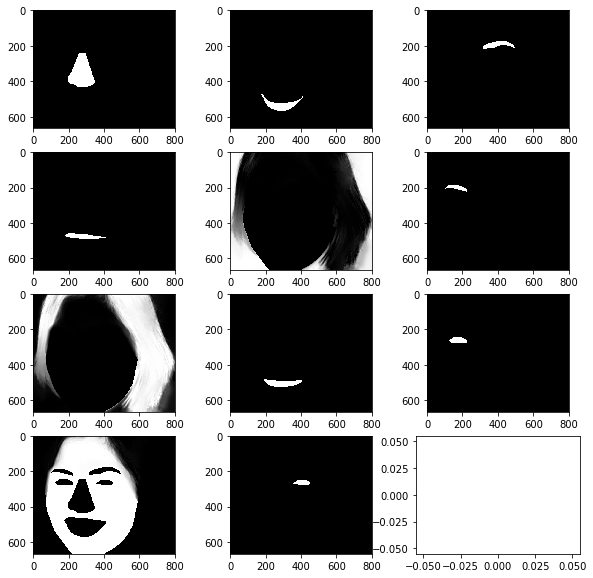

In [67]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
for path, axis in zip(labels_dir.glob("*.png"), axes.flatten()):
    img = cv2.imread(str(path))
    axis.imshow(img, cmap=plt.cm.gray)
plt.plot()

In [56]:
img.shape

(667, 800, 3)

In [60]:
np.unique(img[:,:,0])

array([0., 1.])

In [70]:
img[:,:,1]*=0
img[:,:,2]*=0

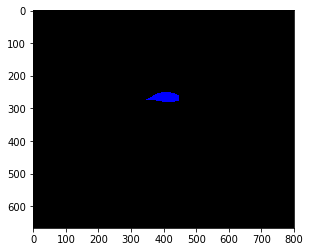

In [71]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [135]:
colors = [[178, 34, 34],[243,152,0],[255,251,0],
       [143,195,31],[0,158,150],[146,7, 131], [0,100,0],[0,0,255],
       [0,160,233],[0,0,100], [229,0,79]]

[]

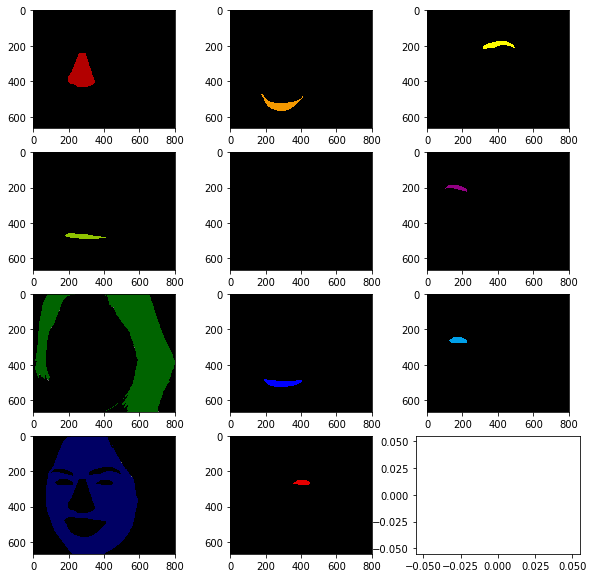

In [146]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
cnt=0
hoge = np.zeros((667,800,3)).astype('uint8')
for path, axis, color in zip(labels_dir.glob("*.png"), axes.flatten(), colors):
    img = cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB)
    if cnt==4:
        img[::] = 0
    else:
        img[:,:,0][np.where(img[:,:,0]>100)] = color[0]
        img[:,:,0][np.where(img[:,:,0]<100)] = 0
        img[:,:,1][np.where(img[:,:,1]>100)] = color[1]
        img[:,:,1][np.where(img[:,:,1]<100)] = 0
        img[:,:,2][np.where(img[:,:,2]>100)] = color[2]
        img[:,:,2][np.where(img[:,:,2]<100)] = 0
    axis.imshow(img)
    hoge += img
    cnt+=1
plt.plot()

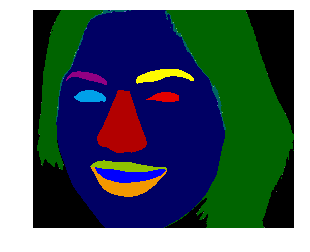

In [147]:
plt.imshow(hoge)
plt.axis('off')
plt.savefig("label_map.pdf")